# Movie Recommender System using Movie Lens Dataset

#### Importing necessary libraries

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Reading the data

In [3]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

#### Exploratory Data Analysis

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


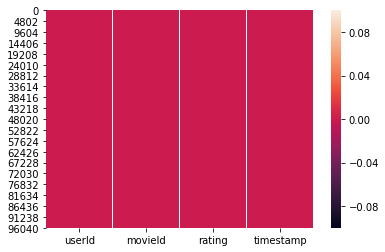

In [17]:
sns.heatmap(ratings.isnull())

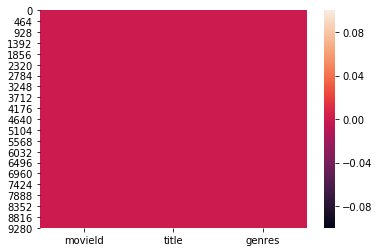

In [18]:
sns.heatmap(movies.isnull())

#### There are no null values in the data

### Feature Engineering

In [20]:
combined_data = pd.merge(movies,ratings, on = 'movieId')

In [21]:
combined_data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


#### Dropping unnecessary columns not required to build a collaborative filtering recommendation system

In [24]:
combined_data.drop(['genres', 'timestamp'], axis =1, inplace = True)

In [25]:
combined_data.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [73]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
movieId    100836 non-null int64
title      100836 non-null object
userId     100836 non-null int64
rating     100836 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.3+ MB


#### Checking the total number of ratings given to each movie

In [75]:
rating_count = combined_data.groupby('title')['rating'].count().sort_values(ascending = False)

In [80]:
ratings_count = rating_count.reset_index()

In [83]:
ratings_count.head()

,title,rating
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278


In [88]:
ratings_count.rename(columns = {'rating': 'rating count'}, inplace = True)

In [89]:
ratings_count.head()

,title,rating count
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278


In [95]:
ratings_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9719 entries, 0 to 9718
Data columns (total 2 columns):
title           9719 non-null object
rating count    9719 non-null int64
dtypes: int64(1), object(1)
memory usage: 152.0+ KB


#### Adding the rating count information to the combined dataframe

In [97]:
rating_count_data = pd.merge(combined_data, ratings_count, on = 'title')

In [98]:
rating_count_data.head()

,movieId,title,userId,rating,rating count
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215


In [100]:
ratings_count['rating count'].describe()

count    9719.000000
mean       10.375141
std        22.406220
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: rating count, dtype: float64

#### Filtering out movies with less than 10 ratings

In [106]:
final_data = rating_count_data[rating_count_data['rating count'] > 10]

In [107]:
final_data

,movieId,title,userId,rating,rating count
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215
...,...,...,...,...,...
100792,187593,Deadpool 2 (2018),331,4.0,12
100793,187593,Deadpool 2 (2018),338,1.0,12
100794,187593,Deadpool 2 (2018),380,3.0,12
100795,187593,Deadpool 2 (2018),514,3.5,12


In [110]:
movie_pivot = final_data.pivot_table(index = 'title', columns ='userId', values='rating')

In [111]:
movie_pivot

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
10 Cloverfield Lane (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
"10,000 BC (2008)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0
Zootopia (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.5,NaN,NaN


In [113]:
movie_pivot.fillna(0, inplace = True)

In [121]:
movie_pivot

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
"10,000 BC (2008)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0
Zootopia (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0


## Creating a collaborative filtering based Recommendation System using Nearest Neighbors

In [128]:
from scipy.sparse import csr_matrix

In [130]:
movie_mat = csr_matrix(movie_pivot.values)

In [132]:
from sklearn.neighbors import NearestNeighbors

In [133]:
movie_model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

In [134]:
movie_model.fit(movie_mat)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

## Creating a function which will take user input and suggest 5 movies closest to it

In [225]:
def get_recommendation():
    x = input("Enter a movie name: ")
    ind = movie_model.kneighbors(movie_pivot.loc[x].values.reshape(1,-1), n_neighbors = 6, return_distance = False)
    for i in range(0,len(ind.flatten())):
        if i ==0:
            print("\nRecommendation for {}:\n".format(x))
        else:
            print(movie_pivot.index[ind.flatten()[i]])

In [226]:
get_recommendation()

Enter a movie name: Crimson Tide (1995)

Recommendation for Crimson Tide (1995):

Clear and Present Danger (1994)
Cliffhanger (1993)
Fugitive, The (1993)
Firm, The (1993)
Outbreak (1995)


In [227]:
get_recommendation()

Enter a movie name: Shawshank Redemption, The (1994)

Recommendation for Shawshank Redemption, The (1994):

Forrest Gump (1994)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Usual Suspects, The (1995)
Schindler's List (1993)


In [228]:
get_recommendation()

Enter a movie name: Matrix, The (1999)

Recommendation for Matrix, The (1999):

Fight Club (1999)
Star Wars: Episode V - The Empire Strikes Back (1980)
Saving Private Ryan (1998)
Star Wars: Episode IV - A New Hope (1977)
Star Wars: Episode VI - Return of the Jedi (1983)
